In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
from progress.bar import Bar
from matplotlib import cm

In [192]:
propval = pd.read_csv('clean_propval_final.csv')

C:\Users\marcu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,22,24,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
propval.head()

,Unnamed: 0,BORO,BLOCK,LOT,EASE,SECVOL,DISTRICT,YEAR4,CUR_FV_L,CUR_FV_T,...,REUC8,REUC9,REUC10,REUC11,REUC12,EX_INDS0,EX_INDS1,EX_INDS2,EX_INDS3,EX_INDS4
0,0,1,75,43,O,102,M1,2010,5690000,9480000,...,False,False,False,False,False,True,False,False,False,False
1,1,1,78,40,O,102,M1,2010,4620000,6140000,...,False,False,False,False,False,True,False,False,False,False
2,2,1,97,17,O,103,M1,2010,2990000,4990000,...,False,False,False,False,False,True,False,False,False,False
3,3,1,97,36,O,103,M1,2010,3950000,6590000,...,False,False,False,False,False,False,False,False,False,True
4,4,1,97,44,O,103,M1,2010,1530000,2550000,...,False,False,False,False,False,True,False,False,False,False


In [21]:
propval.columns[50:75]

Index(['RES_UNIT', 'LFRT_DEC', 'LDEP_DEC', 'L_ACRE', 'IRREG', 'BFRT_DEC',
       'BDEP_DEC', 'EXT', 'STORY', 'BLDGS', 'CORNER', 'LND_AREA', 'GR_SQFT',
       'ZONING', 'YRB', 'YRB_FLAG', 'YRB_RNG', 'YRA1', 'YRA1_RNG', 'YRA2',
       'YRA2_RNG', 'CP_BORO', 'CP_DIST', 'LIMIT', 'O_LIMIT'],
      dtype='object')

In [19]:
propval.YRB

0          1974
1          1910
2          1900
3          1901
4          1998
           ... 
5738470    1925
5738471    1915
5738472    1915
5738473    1950
5738474    1945
Name: YRB, Length: 5738475, dtype: int64

Text(0.5, 1.0, 'Property date rounding, 1900-2000')

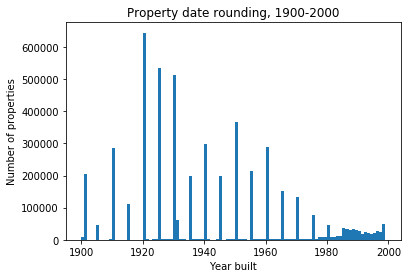

In [20]:
plt.hist(propval.YRB, bins = range(1900, 2000))
plt.xlabel('Year built')
plt.ylabel('Number of properties')
plt.title('Property date rounding, 1900-2000')

In [9]:
#Modify final actual assessed total value to remove property date rounding

In [2]:
example = [[1, 1, 1, 0.5, 0, 0, 0],
           [1, 0.5, 0, 0, 0, 0, 0], 
           [1, 1, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 0.5, 0, 0],
           [1, 1, 1, 0.5, 0, 0, 0],
           [1, 1, 0.5, 0, 0, 0, 0],
           [1, 1, 0.5, 0, 0, 0, 0]]

In [44]:
xrun = [1, 2, 3, 4, 5, 6, 7]
ex0 = [-3, 0, -3, -3, -3, -3, -3]
ex1 = [-1, -3, 2, 3, -2, -1, 2]
ex2 = [0, 0, 1, 2, 0, 0, 1]
white = [0, -2, 0, 0, -1, 0, 0]

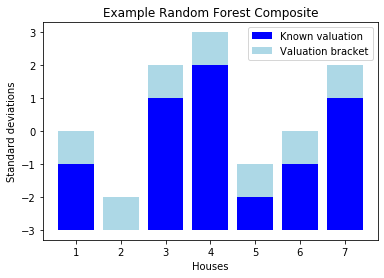

In [52]:
plt.bar(x = xrun, height = ex0, color = 'blue')
plt.bar(x = xrun, height = ex1, color = 'lightblue')
plt.bar(x = xrun, height = ex2, color = 'blue')
plt.bar(x = xrun, height = white, color = 'white')
#plt.axhline(y = -3, ls = ':', color = 'black')
#plt.axhline(y = -2, ls = ':', color = 'black')
#plt.axhline(y = -1, ls = ':', color = 'black')
#plt.axhline(y = 0, ls = '--', color = 'red')
#plt.axhline(y = 1, ls = ':', color = 'black')
#plt.axhline(y = 2, ls = ':', color = 'black')
#plt.axhline(y = 3, ls = ':', color = 'black')
plt.title('Example Random Forest Composite')
plt.xlabel('Houses')
plt.ylabel('Standard deviations')
plt.legend(['Known valuation', 'Valuation bracket'], loc = 'upper right')

In [180]:
ex1 = [2, 4, 5, 3, 2, 5, 1]

In [181]:
data = [[], [], [], [], [], [], []]
for x in range(len(ex1)):
    remainder = ex1[x]
    for y in range(7):
        if y < ex1[x]:
            data[x].append(1)
        else:
            data[x].append(0)

In [182]:
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [183]:
bruteforce = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

In [187]:
b2 = [-.33, 0, 0, .33, .33, .66, -.33, 0, -.66, -.33, -.33, 0, -1, -.66]

([<matplotlib.axis.YTick at 0x1b6d11deb88>,
 <a list of 6 Text yticklabel objects>)

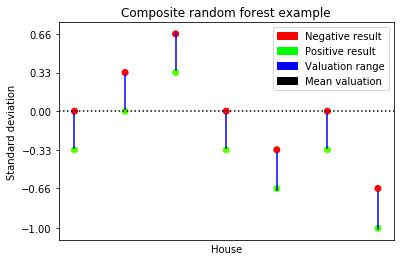

In [189]:
viridis = cm.get_cmap('prism')
plt.scatter(x = bruteforce, y = b2, c = data, cmap = viridis)
plt.xlabel('House')
plt.ylabel('Standard deviation')
plt.axvline(x = 0, ymin = 0.42, ymax = 0.58, c = 'blue')
plt.axvline(x = 1, ymin = 0.60, ymax = 0.76, c = 'blue')
plt.axvline(x = 2, ymin = 0.78, ymax = 0.95, c = 'blue')
plt.axvline(x = 3, ymin = 0.42, ymax = 0.58, c = 'blue')
plt.axvline(x = 4, ymin = 0.23, ymax = 0.40, c = 'blue')
plt.axvline(x = 5, ymin = 0.42, ymax = 0.58, c = 'blue')
plt.axvline(x = 6, ymin = 0.05, ymax = 0.22, c = 'blue')
plt.axhline(0, c = 'black', ls = ':')
red_dot = mpatches.Patch(color = 'red', label = 'Negative result')
green_dot = mpatches.Patch(color = 'lime', label = 'Positive result')
blue_line = mpatches.Patch(color = 'blue', label = 'Valuation range')
black_line = mpatches.Patch(color = 'black', label = 'Mean valuation')
plt.legend(handles = [red_dot, green_dot, blue_line, black_line], loc = 'upper right')
plt.title('Composite random forest example')
plt.xticks([])
plt.yticks([.66, .33, 0, -.33, -.66, -1])

In [70]:
range(0, 7)

range(0, 7)

In [193]:
man_data = propval[propval.BORO == 1]

In [200]:
blocks = man_data.groupby(['BLOCK']).mean()

Text(0, 0.5, 'Mean valuation')

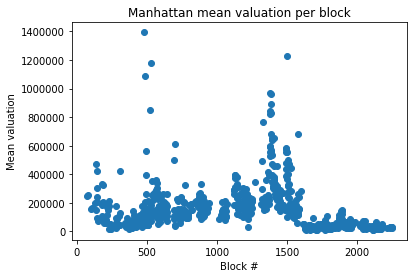

In [204]:
plt.scatter(x = blocks.index, y = blocks.FN_AVT_A)
plt.title('Manhattan mean valuation per block')
plt.xlabel('Block #')
plt.ylabel('Mean valuation')